In [3]:
from model_3 import *
from utils import *

In [4]:
model = Model3()
get_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,640
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 56, 32, 32]           1,848
        MaxPool2d-10           [-1, 56, 16, 16]               0
           Conv2d-11           [-1, 32, 14, 14]          16,160
             ReLU-12           [-1, 32, 14, 14]               0
        GroupNorm-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

c:\Users\SriHarsha\Desktop\S6\S8\model_3.py:88: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


(Model3(
   (block1): Sequential(
     (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): GroupNorm(2, 16, eps=1e-05, affine=True)
     (3): Dropout(p=0.1, inplace=False)
   )
   (block2): Sequential(
     (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): GroupNorm(2, 32, eps=1e-05, affine=True)
     (3): Dropout(p=0.1, inplace=False)
   )
   (transition_block1): Conv2d(32, 56, kernel_size=(1, 1), stride=(1, 1))
   (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (block3): Sequential(
     (0): Conv2d(56, 32, kernel_size=(3, 3), stride=(1, 1))
     (1): ReLU()
     (2): GroupNorm(2, 32, eps=1e-05, affine=True)
     (3): Dropout(p=0.1, inplace=False)
   )
   (block4): Sequential(
     (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): GroupNorm(2, 16, eps=1e-05, affine=True)
     (3): Dropout(p=0.1, inplace=Fal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


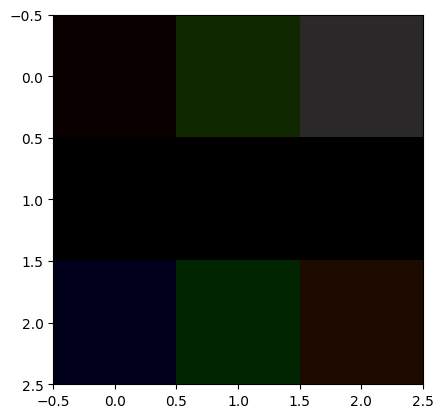

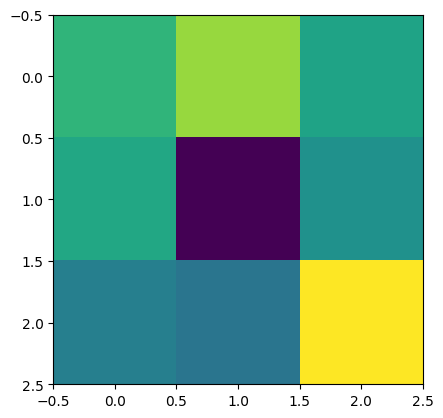

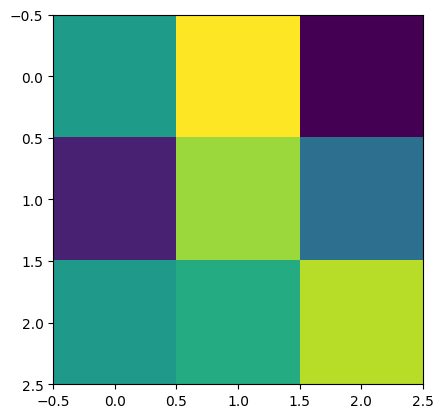

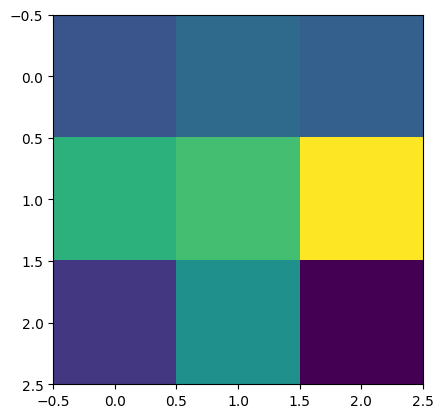

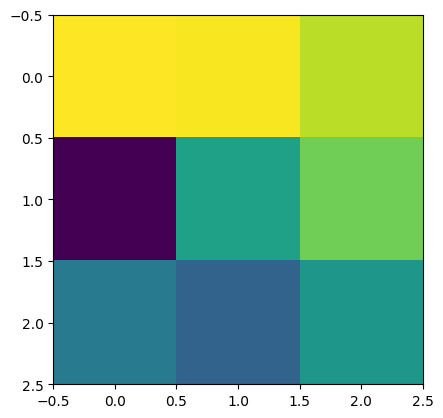

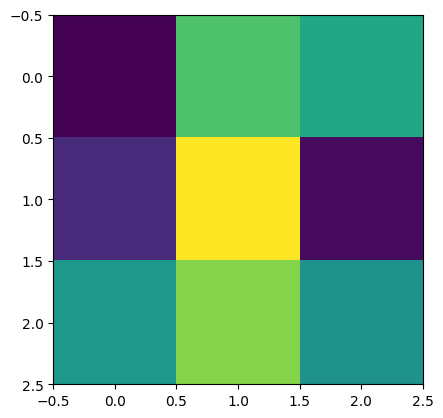

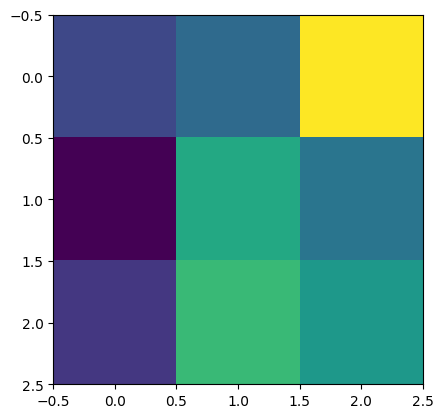

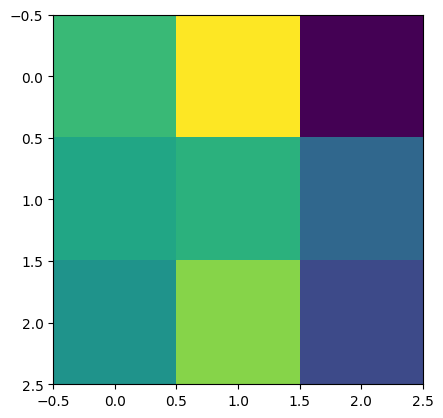

In [25]:
import matplotlib.pyplot as plt
for child in model.children():
   if type(child) == nn.Sequential:
      for child1 in child:
         if type(child1) == nn.Conv2d:
            for idx,param in enumerate(child1.parameters()):
               if (idx==0) and (param.shape[1] <=3):
                     for i in range(param.shape[0]):
                        plt.imshow(param[i].detach().numpy())
                        plt.show()
                        break
               elif (idx==0) and param.shape[1]>3:
                  for i in range(param.shape[0]):
                     npimg = torch.sum(param[0],0).detach().numpy()
                     plt.imshow(npimg)
                     plt.show()
                     break

                     
                  
               

In [15]:
for i,j in enumerate([1,2]):
    print(i)

0
1


In [26]:
t = torch.tensor([True,False,True,True,False])

In [71]:
import numpy as np
type(torch.where(t==False))
indx = torch.where(t==False)[0].numpy()

In [73]:
t[indx]

tensor([False, False])

In [80]:
x =  np.array([[[1,2,3],[4,5,6]], [[1,2,3],[4,5,6]]])

In [81]:
x.shape

(2, 2, 3)

In [116]:
weights = []
for children in model.children():
    if type(children) == nn.Sequential:
        for child in children:
            if type(child) == nn.Conv2d:
                weights.append(child.weight)
                for idx,param in enumerate(child.parameters()):
                    if idx==0:
                        print(type(param.shape))
                        print(type(child.weight.shape))
                        print(param == child.weight)
                


<class 'torch.Size'>
<class 'torch.Size'>
tensor([[[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]]],


        [[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]]],


        [[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]]],


        [[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
  

In [117]:
incorrect_preds = []

In [118]:
incorrect_preds.append(torch.tensor([0,1,2]))

In [120]:
incorrect_preds[0]

tensor([0, 1, 2])

In [122]:
np.where(t==True)

(array([0, 2, 3], dtype=int64),)

In [123]:
x  = []
for i in range(10):
    x.append(i)
    print(x[-1])

0
1
2
3
4
5
6
7
8
9


In [124]:

x = torch.tensor([[[1,2,3],[1,2,3]],[[1,2,3],[1,2,3]]])

In [128]:
x.shape[0]

2

In [130]:
x[0].shape

torch.Size([2, 3])

In [133]:
x.shape

torch.Size([2, 2, 3])

In [135]:
torch.sum(x,axis=1)

tensor([[2, 4, 6],
        [2, 4, 6]])